#   多元迴歸(Multiple regression)，或稱一般線性回歸
*   大於一個自變數(x1,x2,...)的情形。例如 $ y = \beta_0 + \beta_1 x_1 + \beta_1 x_2+ \epsilon $ 。

[參考網址:github](https://github.com/andy6804tw/2021-13th-ironman/tree/main/8.%E7%B7%9A%E6%80%A7%E8%BF%B4%E6%AD%B8)
[參考網址:wiki](https://zh.wikipedia.org/zh-tw/%E7%B7%9A%E6%80%A7%E5%9B%9E%E6%AD%B8)


### 手刻線性回歸
我們透過 Sklearn 所提供的房價預測資料集進行線性回歸模型建模，並採用最小平法。首先為了要驗證我們上面的公式，因此我們先利用 Numpy 套件自己手刻做一系列的矩陣運算求出每一項的係數與截距。<font color = orange> 參考網站使用 Sklearn 提供的資料，此改為用網址直接取得</font>。

用矩陣計算最小平方法, 可以表示成 
*   $\hat{\beta} = (X^TX)^{-1}X^Ty$
*   $\hat{y} = X\hat{\beta} = X(X^TX)^{-1}X^Ty$

並且對於每個 $i=1,...,n$, 用 $\sigma$ 表示 $\epsilon$ 的變異數, 則可得不偏估計
*   $\hat{\sigma}^2 = \frac{S}{n-p}, 其中 S = \Sigma\hat{\epsilon}^2_i$
*   另外, 估計值和實際值之間的關係為 $\hat{\sigma}^2 \frac{n-p}{\sigma^2} \sim x^2_{n-p}$

如果所觀察的誤差服從常態分布。參數的估計值將服從聯合常態分布。在當前的假設之下，估計的參數向量是精確分布的。
*   $\hat{\beta} \sim N(\beta, \sigma(X^TX)^{-1})$

其中$N(．)$表示[多變數常態分布](https://zh.wikipedia.org/zh-tw/%E5%A4%9A%E5%85%83%E6%AD%A3%E6%80%81%E5%88%86%E5%B8%83)。

參數估計值的標準差是：
*   $\hat{\sigma}_j = \sqrt{\frac{S}{n-p}[(X^TX)^{-1}]_{jj}}$
*   $100(1-\alpha) $ CI : $\hat{\beta}_j \pm t_{\frac{\alpha}{2},n-p}\hat{\sigma}_j$

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

# 載入 Sklearn 房價預測資料集 13個輸入特徵 1個輸出特徵
#boston_dataset = load_boston() #使用sklearn提供的資料
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
#data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
#target = raw_df.values[1::2, 2]

# 輸入特徵共13個
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# 設定截距項 b 權重值為 1 
b=np.ones((X.shape[0], 1))
# 添加常數項特徵，最終有 13+1 個輸入特徵
X=np.hstack((X, b))
# 輸出(房價)
y = raw_df.values[1::2, 2]

# 計算 Beta (@ 為 numpy 中 2-D arrays 的矩陣乘法)
Beta = np.linalg.inv(X.T @ X) @ X.T @ y
y_pred = X @ Beta

print('MSE:', mean_squared_error(y_pred, y))
print("beta = %s" %Beta)

MSE: 21.894831181729206
beta = [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01  3.64594884e+01]


---

### Sklearn LinearRegression 模型
線性回歸簡單來說，就是將複雜的資料數據，擬和至一條直線上，就能方便預測未來的資料。接下來我們一樣使用房價預測資料集，並使用 Sklearn 提供的 LinearRegression 來求解。

Parameters:
*   fit_intercept: 是否有截距，如果沒有則直線過原點。

Attributes:
*   coef_: 取得係數。
*   intercept_: 取得截距。

Methods:
*   fit: 放入X、y進行模型擬合。
*   predict: 預測並回傳預測類別。
*   score: R2 score 模型評估。

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression


# 載入 Sklearn 房價預測資料集 13個輸入特徵 1個輸出特徵
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# 輸入特徵共13個
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
# 輸出(房價)
y = raw_df.values[1::2, 2]

# 訓練模型
linearModel = LinearRegression()
linearModel.fit(X, y)

y_pred = linearModel.predict(X)
print('MSE:', mean_squared_error(y_pred, y))

MSE: 21.894831181729202


In [3]:
# 取得13個特徵係數
print("係數 : %s" %linearModel.coef_)
# 取得截距
print("截距 : %s" %linearModel.intercept_)

係數 : [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
截距 : 36.459488385089855


---

### 迴歸分析的 ANOVA(變異數分析;方差) 表

製作迴歸的 ANOVA 表的目的在於，檢定自變量是否能解釋依變量，也可以用來比較同依變量不同自變量的 p值(越低代表那些自變量較能解釋依變量)。

其中，ANOVA 的 sum of squares(SS) 有分為 type I SS, type II SS 和 type III SS。
*   type I : 按照順序將變異分配給不同的變項, 例如有 A, B 兩變項及 AB 的交互作用項, 依順序放入, 則各個變項的變異分別是 SSR(A), SSR(B|A), SSR(AB|B,A). 因為順序會影響結果, 所以必須決定變異放入的順序.
*   type II : 沒有變項放入順序問題. 並且 type II 假設沒有交互作用(若檢定出來有交互作用項則無法使用 type II), 所以各變異分別為 SSR(A|B), SSR(B|A).
*   type III: 和 type II 一樣沒有變項放入順序的問題, 但此 type 會考慮有交互作用項, 所以各變異分別為 SSR(A|B, AB), SSR(B|A, AB).
*   type II 和 III 也可以說是看最後放入該變項後 SSR 的改變量.
*   [參考網站 : Anova – Type I/II/III SS explained](https://www.r-bloggers.com/2011/03/anova-%E2%80%93-type-iiiiii-ss-explained/)
*   [參考網站 : facebook](https://www.facebook.com/258972167562965/posts/2711039792356178/)

為了決定要用那些自變量，可以使用不同方法，例如 forward、backward ，又稱逐步迴歸。
*   Forward : 從完全沒有自變量開始，和所有未放入的自變量一一配對，選擇放入後決定係數最高的特徵, 重複直到決定係數上升率小於限制值(自己給定)或沒有特徵能放入.
*   Backward : 和 Forward 類似，不過是從選擇所有自變量開始一一移除。
*   Forward & Backward : 放入和刪除同時進行，選擇最高的決定係數
*   [參考網站 : Understand Forward And Backward Stepwise Regression](https://quantifyinghealth.com/stepwise-selection/)

<img src="https://imgur.com/3ygHs0q.png" width="70%" height="70%">

參考資料:
*   [【统计学笔记】方差分析表和回归分析表的解读](https://blog.csdn.net/MYMarcoreus/article/details/111945748)
*   [多元线性回归方差分析表理解](https://blog.51cto.com/u_14902625/5472080)

其他程式:
*   R : [ANOVA and model fit](https://bookdown.org/egarpor/SSS2-UC3M/multlin-aovfit.html)

#### python

參考資料 :
*   [Python回歸模型01─運用OLS做回歸](https://ithelp.ithome.com.tw/articles/10283807?sc=pt)
*   [Python画图 %matplotlib inline语句的使用和作用](https://blog.csdn.net/leowinbow/article/details/86574159)

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm     #回歸模型套件

In [5]:
data = pd.read_csv('mranova_test.csv', index_col = 'i') 

# 此資料是用R隨便生成的, 程式如下(當然也能用python生成)
'''
set.seed(42)
u <- rnorm(100)
v <- rnorm(100, mean = 3,  sd = 2)
w <- rnorm(100, mean = -3, sd = 1)
e <- rnorm(100, mean = 0,  sd = 3)
p <- rnorm(100, mean = 0,  sd = 1)
d <- rnorm(100, mean = 5, sd = 20)
y <- 5 + 4 * u + 3 * v + 2 * w + e + p
'''
data

,y,u,v,w,e,d
i,,,,,,
1,18.008818,1.370958,5.401931,-5.000929,-0.013862,25.582814
2,14.088723,-0.564698,5.089502,-2.666223,2.280727,23.295497
3,5.948372,0.363128,0.993583,-1.828675,0.116973,4.950875
4,27.995704,0.632863,6.696964,-0.940461,2.205216,7.720191
5,1.844936,0.404268,1.666453,-4.376862,-0.439418,-9.403071
...,...,...,...,...,...,...
96,14.082475,-0.860793,5.171550,-3.477336,3.289540,8.206548
97,7.787811,-1.131739,3.807550,-3.166261,1.326039,-3.672839
98,6.940927,-1.459214,4.172975,-2.137437,0.723049,35.748248


In [6]:
dfX = data.drop('y', axis=1) #刪除 y 那個 col 後，剩下的為自變數
dfY = data[['y']]

dfX_corr = dfX.corr() #查看數據間的相關係數
print(dfX_corr)


          u         v         w         e         d
u  1.000000  0.031280 -0.144777  0.074237 -0.042283
v  0.031280  1.000000  0.071227  0.008645 -0.198933
w -0.144777  0.071227  1.000000 -0.045980  0.100537
e  0.074237  0.008645 -0.045980  1.000000  0.069408
d -0.042283 -0.198933  0.100537  0.069408  1.000000


<AxesSubplot:>

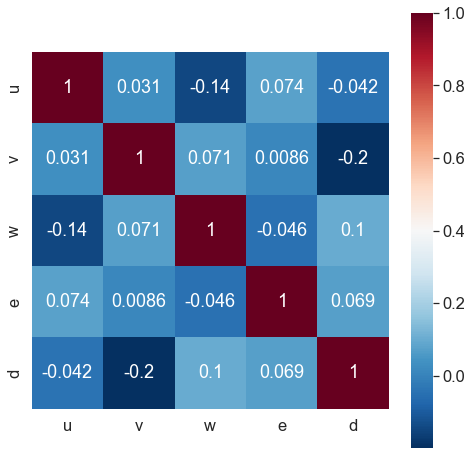

In [7]:
#視覺化
%matplotlib inline 
#%matplotlib inline这一句是IPython的魔法函数，可以在IPython编译器里直接使用，作用是内嵌画图，省略掉plt.show()这一步，直接显示图像 
import seaborn as sns
sns.set(font_scale=1.5) #字體大小
sns.set_context({"figure.figsize":(8,8)}) #圖形大小
sns.heatmap(data = dfX_corr, square = True, cmap="RdBu_r", annot = True) 

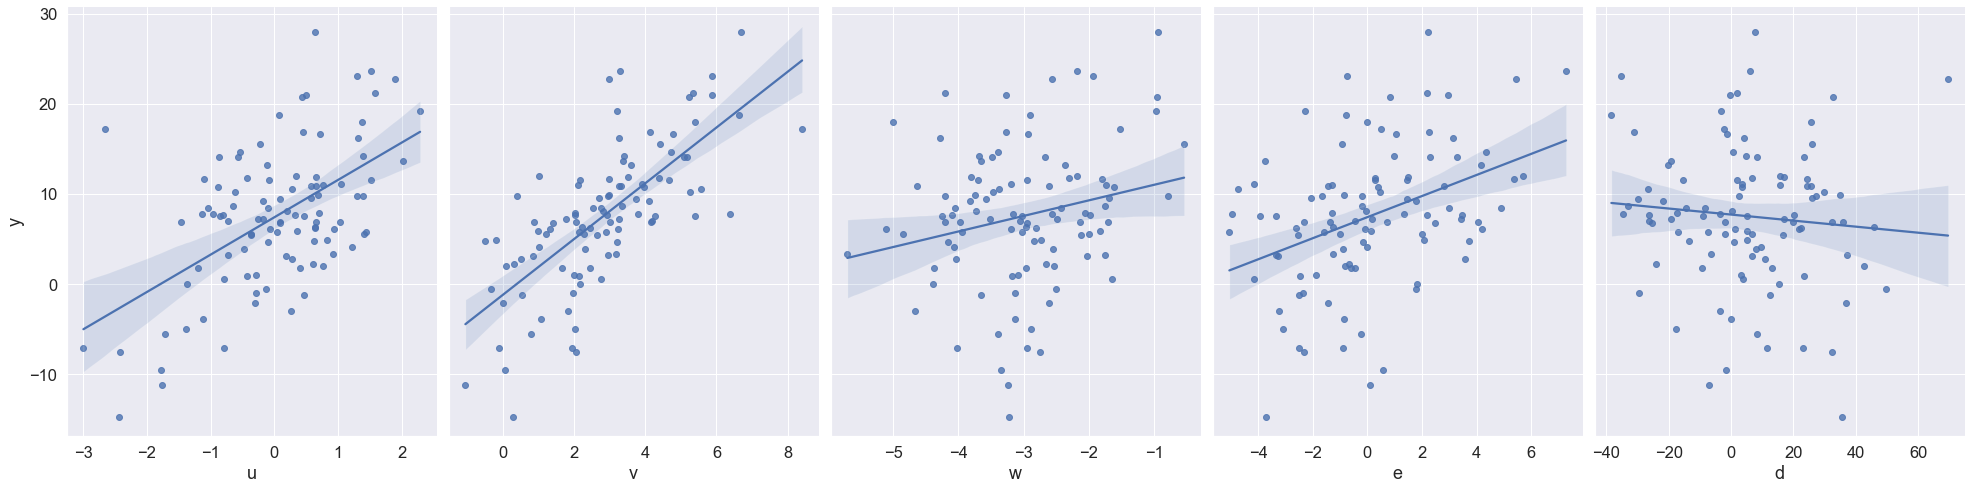

In [8]:
#檢視資料分布情形
import seaborn as sns               #載入分布圖形套件
import matplotlib.pyplot as plt     #載入畫圖套件

sns.pairplot(data, x_vars=["u", "v", "w", "e", 'd'], y_vars='y',height = 7, aspect = 0.8, kind='reg')  
plt.show()

In [9]:
#建模
dfX = sm.add_constant(dfX)   #增加模型的常數，使之更符合回歸模型

model0 = sm.OLS(dfY, dfX)    #OLS (ordinary least square:最小平方法)回歸
results0 = model0.fit()

print(results0.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1181.
Date:                Tue, 25 Jul 2023   Prob (F-statistic):           3.66e-83
Time:                        23:15:25   Log-Likelihood:                -139.47
No. Observations:                 100   AIC:                             290.9
Df Residuals:                      94   BIC:                             306.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2475      0.379     13.858      0.0

由上可見，參數 p 不太能解釋 y (p_value = 0.844 > 0.05)。

<font color = orange>使用 sklearn.linear_model.LinearRegression建模, 結果和上面一樣</font>

In [10]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import scipy.stats as ss

In [11]:
data = pd.read_csv('mranova_test.csv', index_col = 'i') 

In [12]:
#X = data.iloc[:,1:].values
#y = data.iloc[:,0].values
X = data.drop('y', axis=1).values
y = data[['y']].values
colnames = list(data.columns[1:])

# 訓練模型
linearModel = LinearRegression()
linearModel.fit(X, y)
linearModel.coef_  #迴歸的係數值

y_pred = linearModel.predict(X)
np.sum((np.mean(y) - y_pred)**2)

5983.362623539313

如果想要使用 sklearn.linear_model 的 LinearRegression 求和 statsmodels.api 的 summary 顯示的 p_value ，可以參考以下函數。

忘記 ts_b 是為什麼的可以參考最上方的公式, 由 CI 轉換可以得到 $t_j^* = \hat{\beta}_j/\hat{\sigma}_j$ (因為這邊 $H_0$ 是$\beta = 0$), 其中$\hat{\sigma}_j = \sqrt{\frac{S}{n-p}[(X^TX)^{-1}]_{jj}}$, 並且$\frac{S}{n-p} = MSE$

[def參考](https://stackoverflow.com/questions/27928275/find-p-value-significance-in-scikit-learn-linearregression)

In [13]:
def coefficient_summary(linearModel,X): #可以使用此方法找各個係數的 p value, 但是這裡我不用這個去做, 而是一個一個慢慢找. 此方法當作參考用
    params = np.append(linearModel.intercept_,linearModel.coef_) #係數
    predictions = linearModel.predict(X) 

    newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
    MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

    var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    sd_b = np.sqrt(var_b)
    ts_b = params/ sd_b

    p_values =[2*(1-ss.t.cdf(np.abs(i),(len(newX)-len(newX.columns)))) for i in ts_b]

    sd_b = np.round(sd_b,3)
    ts_b = np.round(ts_b,3)
    p_values = np.round(p_values,3)
    params = np.round(params,4)

    myDF3 = pd.DataFrame()
    myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilities"] = [params,sd_b,ts_b,p_values]
    return myDF3

coefficient_summary(linearModel, X)

,Coefficients,Standard Errors,t values,Probabilities
0,5.2475,0.379,13.858,0.000
1,4.0888,0.099,41.492,0.000
2,2.9393,0.057,51.205,0.000
3,2.0768,0.102,20.441,0.000
4,1.0678,0.039,27.557,0.000
5,0.0055,0.005,1.124,0.264


---

##### ANOVA 表格製作

<font color = red size = 5> 此 code 是舊的, 新的在 006.sklearn/007.ANOVA.ipynb</font> 


In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import scipy.stats as ss

data = pd.read_csv('mranova_test.csv', index_col = 'i') 

X = data.iloc[:,1:].values
y = data.iloc[:,0].values
colnames = list(data.columns[1:])

# 訓練模型
linearModel = LinearRegression()
linearModel.fit(X, y)
linearModel.coef_  #迴歸的係數值

y_pred = linearModel.predict(X)


##### type I

如果使用 R 的 ANOVA 求的表格，因為 type I 是按照順序增加參數進去的意思。換句話說，如果改變放置參數順序，結果會不一樣。如下圖。

<img src="https://imgur.com/rwZZ6ah.png" width="40%" height="40%">

<img src="https://imgur.com/n6fw1Pl.png" width="40%" height="40%">



所以以下和 R ANOVA 的 SSR 結果不一樣是因為, <font color = orange>R 的 SSR 跟順序有關</font>, 並非每個參數去算的結果. 

例如按照順序放 u,v,w,e,d (和下面的順序一樣), R 的 SSR 結果為 1849.07, 2959.24, 394.09, 779.69, 95.27

此 2959.24 是 放入 u, v 的 SS 去扣掉只放入 u 的 SSR, 並非如下 程式框 的3104, 而是下下個 程式框.

In [15]:
for i in range(len(X[0])): 
    LM = LinearRegression()
    X1 = X[:,[i]]

    LM.fit(X1, y)
    y1_pred = LM.predict(X1)
    print(np.sum((np.mean(y) - y1_pred)**2))

1849.0682062531785
3104.4185281282257
305.63040829264725
939.0990450493068
50.322233121499984


In [16]:
LM = LinearRegression()
X1 = X[:,[0,1]]

LM.fit(X1, y)
y1_pred = LM.predict(X1)
print(np.sum((np.mean(y) - y1_pred)**2))
print('-'*50)
print('4808.30 - 1849.06 = {}'.format(4808.30 - 1849.06))  #SSR(2|1) = SSR(1,2) - SSR(1)

4808.305314449755
--------------------------------------------------
4808.30 - 1849.06 = 2959.2400000000002


##### Forward
* 解釋Forward : 從完全沒有自變量開始，和所有未放入的自變量一一配對，選擇放入後決定係數最高的特徵, 重複直到決定係數上升率小於限制值(自己給定)或沒有特徵能放入.

從上面 R 的結果可以知道, <font color = orange>特徵選擇的順序會影響特徵的 p_value</font>, 例如上面 R 圖左邊特徵 d 是不顯著的, 但是在右圖卻顯著. 

並且通常建立模型會避免過多且不重要的特徵, 特徵選擇(Feature selection) 的方法很多, 以下使用 Forward 為例子。判斷方法是使用 SSR, 結果和使用 $R^2$ 一樣, 因為 SST 固定所以 SSR越大 $R^2$ 越大.

In [17]:
s = []
while len(s) < len(X[0]) :
    feature_list = [i for i in range(len(X[0])) if not(i in s)]
    Max_i = 0
    Max_v = 0
    for i in feature_list:
        LM = LinearRegression()
        feature_i = s + [i]
        X1 = X[:,feature_i]

        LM.fit(X1, y)
        y1_pred = LM.predict(X1)
        SSR = np.sum((np.mean(y) - y1_pred)**2)
        if SSR > Max_v : 
            Max_i = i
            Max_v = SSR
    s += [Max_i]

print('特徵選擇順序為 : {}'.format([colnames[i] for i in s] ))

特徵選擇順序為 : ['v', 'u', 'e', 'w', 'd']


##### Backward
Backward : 和 Forward 類似，不過是從選擇所有自變量開始一一移除。

隨機扣掉一個特徵後, 選擇結果 SSR 最大的, 因為代表是選擇 SSR 降低最少的. 其選擇扣掉的順序和 Forward 選擇放入的順序相反.

In [18]:
s = [i for i in range(len(X[0]))]
def_fea = []
while len(s) > 1 : #不能為 > 0, 因為剩下一個後, 能扣掉的就只有剩下那個.
    Max_i = 0
    Max_v = 0
    for i in s:
        feature_list = [j for j in s if not(j == i)] #按照 s 的順序不選特徵

        LM = LinearRegression()
        X1 = X[:,feature_list]
        LM.fit(X1, y)

        y1_pred = LM.predict(X1)
        SSR = np.sum((np.mean(y) - y1_pred)**2)
        if SSR > Max_v : # SSR 最大的代表扣掉後 SSR 降低最少的
            Max_i = i
            Max_v = SSR

    s = [j for j in s if not(j == Max_i)]
    def_fea.append(Max_i)
def_fea += s

print('扣掉的特徵選擇順序為 : {}'.format([colnames[i] for i in def_fea] ))

扣掉的特徵選擇順序為 : ['d', 'w', 'e', 'u', 'v']


Forward 和 Backward 也可以增加停止條件, 就不用全部特徵都算過一次.

Forward & Backward 做法類似, 就是在算新增特徵同時也算刪除特徵的效益, 因為有些特徵會有交互作用等因素存在, 所以不一定按照得到的順序去放特徵就是最佳的結果.
另外此方法如果直接去計算所有特徵結果, 可能會有重複計算 (同個特徵順序又算一次) 的問題, 所以如果要寫可以把每次結果記錄下來, 在算的時候也去看之前有沒有算過那個特徵順序, 可以減少計算時間.

另外, 除了以上方法還有暴力法可以用, 就是直接算所有特徵的順序, 不過其計算成本太高, 不建議使用.

In [1]:
#class 有用到的 function

def Forward(X, y):
    s = []
    while len(s) < len(X[0]) :
        feature_list = [i for i in range(len(X[0])) if not(i in s)]
        Max_i = 0
        Max_v = 0
        for i in feature_list:
            LM = LinearRegression()
            feature_i = s + [i]
            X1 = X[:,feature_i]

            LM.fit(X1, y)
            y1_pred = LM.predict(X1)
            SSR = np.sum((np.mean(y) - y1_pred)**2)
            if SSR > Max_v : 
                Max_i = i
                Max_v = SSR
        s += [Max_i]
    return s


def value_code(x):
    if x < 0.001:
        return '***'
    if x < 0.01:
        return '**'
    if x < 0.05:
        return '*'
    if x < 0.1:
        return '.'
    else:
        return ''

In [2]:
class regression_ANOVA:
    def __init__(self, data):
        """
        y : 應變數
        y_hat : 預測結果
        X : 參數值

        """
        #raw data
        self.y = data.iloc[:,0].values
        self.X = data.iloc[:,1:].values
        self.colnames = list(data.columns[1:])

        linearModel = LinearRegression()
        linearModel.fit(self.X, self.y)
        self.y_hat = linearModel.predict(self.X)
        self.Tl, self.Pl = np.shape(self.X)
        self.Rl = self.Tl - self.Pl - 1

    ### function
    def Forward(self):
        s = []
        while len(s) < len(self.X[0]) :
            feature_list = [i for i in range(len(self.X[0])) if not(i in s)]
            Max_i = 0
            Max_v = 0
            for i in feature_list:
                LM = LinearRegression()
                feature_i = s + [i]
                X1 = self.X[:,feature_i]

                LM.fit(X1, self.y)
                y1_pred = LM.predict(X1)
                SSR = np.sum((np.mean(self.y) - y1_pred)**2)
                if SSR > Max_v : 
                    Max_i = i
                    Max_v = SSR
            s += [Max_i]
        return s
    
    def value_code(self, x):
        if x < 0.001:
            return '***'
        if x < 0.01:
            return '**'
        if x < 0.05:
            return '*'
        if x < 0.1:
            return '.'
        else:
            return ''

    ### 
    def SST(self):
        return round(np.sum((np.mean(self.y) - self.y)**2), 3)

    def SSR(self):
        return round(np.sum((np.mean(self.y) - self.y_hat)**2), 3)

    def SSE(self):
        return round(np.sum((self.y - self.y_hat)**2), 3)

    def MSR(self):
        return round(self.SSR()/self.Pl,3)
    
    def MSE(self):
        return round(self.SSE()/self.Rl,3)
    
    def P_value(self):
        return round(1 - ss.f.cdf(self.MSR()/self.MSE(), self.Pl, self.Rl), 5)


    ### table
    def ANOVA_table(self):
        table = \
                '='*120 + '\n' +\
                '{0:^16}'.format("變異來源")  +'{0:^16}'.format("平方和(SS)") +\
                     '{0:^16}'.format("自由度(DF)") + '{0:^16}'.format("平均平方和(MS)") +\
                        '{0:^16}'.format("檢定統計量(F value)") + '{0:^16}'.format("p_value") + '\n' +\
                '-'*120 + '\n' +\
                '{0:^18}'.format("迴歸(Predictors)")+ '{0:>12}'.format(self.SSR()) +\
                     '{0:>17}'.format(self.Pl) + '{0:>22}'.format(self.MSR()) +\
                        '{0:>20}'.format(round(self.MSR()/self.MSE(),3)) + '{0:>17}'.format(self.P_value()) + '{0:>5}'.format(self.value_code(self.P_value())) +'\n' +\
                '\n' +\
                '{0:^18}'.format("殘差(Residuals)")  + '{0:>12}'.format(self.SSE()) +\
                     '{0:>17}'.format(self.Rl) + '{0:>22}'.format(self.MSE()) +\
                        '{0:>20}'.format("") + '{0:^10}'.format("") + '\n' +\
                '-'*120 +'\n' +\
                '{0:^18}'.format("總和(Total)") + '{0:>12}'.format(self.SST()) +\
                     '{0:>17}'.format(self.Tl - 1) + '{0:>22}'.format('') +\
                        '{0:^32}'.format("") + '{0:^10}'.format("") + '\n' +\
                '='*120 + '\n' +\
                "Signif. codes : 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 '' 1 "
        print(table)


    def ANOVA_table_typeI(self):
        feature_order = self.Forward()
        ## 計算各個 SSR 的遞增值
        feature_i = []
        SSR_list = [0]

        for i in feature_order:
            LM = LinearRegression()
            feature_i.append(i)
            X1 = self.X[:,feature_i]

            LM.fit(X1, self.y)
            y1_pred = LM.predict(X1)
            SSR_list.append(round(np.sum(((np.mean(self.y) - y1_pred)**2))  - np.sum(SSR_list),3))
        SSR_list = SSR_list[1:]


        table = \
                '='*120 + '\n' +\
                '{0:^16}'.format("變異來源")  +'{0:^16}'.format("平方和(SS)") +\
                     '{0:^16}'.format("自由度(DF)") + '{0:^16}'.format("平均平方和(MS)") +\
                        '{0:^16}'.format("檢定統計量(F value)") + '{0:^16}'.format("p_value") + '\n' +\
                '-'*120 + '\n' +\
                '{0:^18}'.format("迴歸(Predictors)") + '{0:>12}'.format(self.SSR()) +\
                     '{0:>17}'.format(self.Pl) + '{0:>22}'.format(self.MSR()) +\
                        '{0:>20}'.format(round(self.MSR()/self.MSE(),3)) + '{0:>17}'.format(self.P_value()) + '{0:>5}'.format(self.value_code(self.P_value())) +'\n' +\
                '\n' 

        for i in range(len(feature_order)):
            feature_index = feature_order[i]
            F_value = round(SSR_list[i]/self.MSE(),3)
            p_value = round(1 - ss.f.cdf(F_value, 1, self.Rl), 5)
            table += '{0:>16}'.format(self.colnames[feature_index])  + '{0:>16}'.format(SSR_list[i]) +\
                     '{0:>17}'.format(1) + '{0:>22}'.format(SSR_list[i]) +\
                     '{0:>20}'.format(F_value) + '{0:>17}'.format(p_value) + '{0:>5}'.format(self.value_code(p_value)) +'\n' +\
                '\n' 
        

        table +=\
                '{0:^18}'.format("殘差(Residuals)")  + '{0:>12}'.format(self.SSE()) +\
                     '{0:>17}'.format(self.Rl) + '{0:>22}'.format(self.MSE()) +\
                        '{0:>20}'.format("") + '{0:^10}'.format("") + '\n' +\
                '-'*120 +'\n' +\
                '{0:^18}'.format("總和(Total)") + '{0:>12}'.format(self.SST()) +\
                     '{0:>17}'.format(self.Tl - 1) + '{0:>22}'.format('') +\
                        '{0:>20}'.format("") + '{0:^10}'.format("") + '\n' +\
                '='*120 + '\n' +\
                "Signif. codes : 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 '' 1 "
        
        print(table)


    def ANOVA_table_typeII(self):
        feature_order = self.Forward()
        ## 計算各個 SSR 的遞增值
        feature_i = []
        SSR_list = []
        SSR = self.SSR()

        for i in feature_order:
            LM = LinearRegression()
            feature_i = [j for j in range(len(feature_order)) if j != i]
            X1 = self.X[:,feature_i]

            LM.fit(X1, self.y)
            y1_pred = LM.predict(X1)
            SSR_list.append(round(SSR - np.sum(((np.mean(self.y) - y1_pred)**2)) ,3))


        table = \
                '='*120 + '\n' +\
                '{0:^16}'.format("變異來源")  +'{0:^16}'.format("平方和(SS)") +\
                     '{0:^16}'.format("自由度(DF)") + '{0:^16}'.format("平均平方和(MS)") +\
                        '{0:^16}'.format("檢定統計量(F value)") + '{0:^16}'.format("p_value") + '\n' +\
                '-'*120 + '\n' +\
                '{0:^18}'.format("迴歸(Predictors)") + '{0:>12}'.format(self.SSR()) +\
                     '{0:>17}'.format(self.Pl) + '{0:>22}'.format(self.MSR()) +\
                        '{0:>20}'.format(round(self.MSR()/self.MSE(),3)) + '{0:>17}'.format(self.P_value()) + '{0:>5}'.format(self.value_code(self.P_value())) +'\n' +\
                '\n' 

        for i in range(len(feature_order)):
            feature_index = feature_order[i]
            F_value = round(SSR_list[i]/self.MSE(),3)
            p_value = round(1 - ss.f.cdf(F_value, 1, self.Rl), 5)
            table += '{0:>16}'.format(self.colnames[feature_index])  + '{0:>16}'.format(SSR_list[i]) +\
                     '{0:>17}'.format(1) + '{0:>22}'.format(SSR_list[i]) +\
                     '{0:>20}'.format(F_value) + '{0:>17}'.format(p_value) + '{0:>5}'.format(self.value_code(p_value)) +'\n' +\
                '\n' 
        

        table +=\
                '{0:^18}'.format("殘差(Residuals)")  + '{0:>12}'.format(self.SSE()) +\
                     '{0:>17}'.format(self.Rl) + '{0:>22}'.format(self.MSE()) +\
                        '{0:>20}'.format("") + '{0:^10}'.format("") + '\n' +\
                '-'*120 +'\n' +\
                '{0:^18}'.format("總和(Total)") + '{0:>12}'.format(self.SST()) +\
                     '{0:>17}'.format(self.Tl - 1) + '{0:>22}'.format('') +\
                        '{0:>20}'.format("") + '{0:^10}'.format("") + '\n' +\
                '='*120 + '\n' +\
                "Signif. codes : 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 '' 1 "
        
        print(table)



In [5]:
# anova table
anova = regression_ANOVA(data)
anova.ANOVA_table()

      變異來源          平方和(SS)         自由度(DF)        平均平方和(MS)     檢定統計量(F value)     p_value     
------------------------------------------------------------------------------------------------------------------------
  迴歸(Predictors)      5983.363                5              1196.673            1180.151              0.0  ***

  殘差(Residuals)         95.269               94                 1.014                              
------------------------------------------------------------------------------------------------------------------------
    總和(Total)         6078.632               99                                                                
Signif. codes : 0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 '' 1 


In [22]:
# type I
anova = regression_ANOVA(data)
anova.ANOVA_table_typeI()

      變異來源          平方和(SS)         自由度(DF)        平均平方和(MS)     檢定統計量(F value)     p_value     
------------------------------------------------------------------------------------------------------------------------
  迴歸(Predictors)      5983.363                5              1196.673            1180.151              0.0  ***

               v        3104.419                1              3104.419            3061.557              0.0  ***

               u        1703.886                1              1703.886            1680.361              0.0  ***

               e         738.965                1               738.965             728.762              0.0  ***

               w         434.811                1               434.811             428.808              0.0  ***

               d           1.282                1                 1.282               1.264          0.26376     

  殘差(Residuals)         95.269               94                 1.014                         

In [23]:
# type II
anova = regression_ANOVA(data)
anova.ANOVA_table_typeII()

      變異來源          平方和(SS)         自由度(DF)        平均平方和(MS)     檢定統計量(F value)     p_value     
------------------------------------------------------------------------------------------------------------------------
  迴歸(Predictors)      5983.363                5              1196.673            1180.151              0.0  ***

               v        2657.318                1              2657.318            2620.629              0.0  ***

               u        1744.852                1              1744.852            1720.761              0.0  ***

               e          769.62                1                769.62             758.994              0.0  ***

               w         423.484                1               423.484             417.637              0.0  ***

               d           1.282                1                 1.282               1.264          0.26376     

  殘差(Residuals)         95.269               94                 1.014                         